## ASSIGNMENT 7

## Section 1

Write Qiskit code to play the Quantum Coin Game. Compare the efficiency of the quantum coin game
over classical coin toss game.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# Quantum Coin Game Setup

# Create a 1-qubit quantum circuit with 1 classical bit
qc = QuantumCircuit(1, 1)

# Apply Hadamard gate to create superposition (like flipping a quantum coin)
qc.h(0)

# Apply Identity (represents no change / no move in the game)
qc.id(0)

# Apply Hadamard again to interfere with original state
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024 * 1000)  # 1 million shots for better stats
result = job.result()
quantum_counts = result.get_counts()

print("Quantum Coin Game Result:", quantum_counts)

# Classical Coin Toss Simulation

# Toss a classical coin 1 million times
heads = 0
tails = 0
for _ in range(1024 * 1000):
    if random.random() < 0.5:
        heads += 1
    else:
        tails += 1

classical_counts = {'0': heads, '1': tails}
print("Classical Coin Toss Result:", classical_counts)


Quantum Coin Game Result: {'0': 1024000}
Classical Coin Toss Result: {'0': 512335, '1': 511665}


In [2]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

fig = plot_histogram(
    [quantum_counts, classical_counts],
    legend=['Quantum', 'Classical'],
    bar_labels=True
)
fig.savefig("coin_output.png")
print("Plot saved as coin_output.png")


Plot saved as coin_output.png


## Output
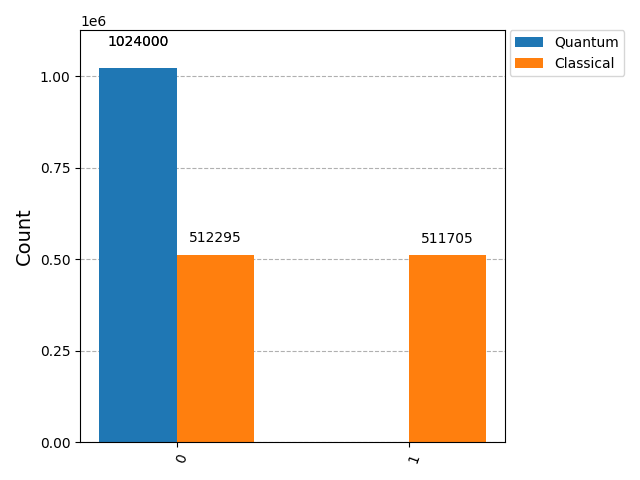

## Section 2
Write Qiskit code for Estimating Pi Using Quantum Phase Estimation Algorithm

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# We choose theta = 1/2, so 2πθ = π
theta = 1 / 2

# Define unitary U with phase shift 2πθ = π
U = QuantumCircuit(1)
U.p(2 * np.pi * theta, 0)
U_gate = U.to_gate()
U_gate.name = "U"

# QPE setup
n_count = 4  # Use more qubits for better precision
qc = QuantumCircuit(n_count + 1, n_count)

# Prepare eigenvector |1>
qc.x(n_count)

# Apply Hadamard to counting qubits
qc.h(range(n_count))

# Apply controlled-U^{2^j}
for q in range(n_count):
    for _ in range(2 ** q):
        qc.append(U_gate.control(), [q, n_count])

# Apply inverse QFT
qc.append(QFT(n_count, inverse=True, do_swaps=True).to_gate(), range(n_count))

# Measurement
qc.measure(range(n_count), range(n_count))

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()
counts = result.get_counts()

# Estimate phase
max_key = max(counts, key=counts.get)
theta_est = int(max_key, 2) / (2 ** n_count)
pi_est = 2 * np.pi * theta_est

# Results
print(f"Most likely θ = {theta_est}")
print(f"Estimated π ≈ {pi_est:.6f}")
print(f"Actual π ≈ {np.pi:.6f}")


Most likely θ = 0.5
Estimated π ≈ 3.141593
Actual π ≈ 3.141593


In [4]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

fig = plot_histogram(counts)
fig.savefig("pi_output.png")
print("Plot saved as pi_output.png")


Plot saved as pi_output.png


## Output
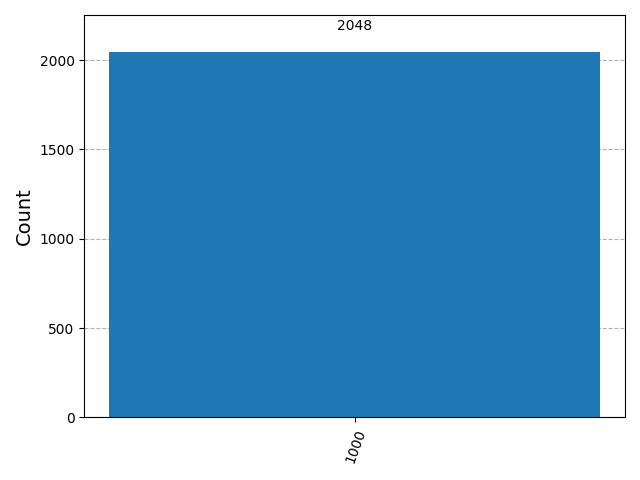

## Section 3
Implement the Deutsch-Jozsa Algorithm

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

def dj_circuit(oracle, n):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.append(oracle.to_gate(), range(n + 1))
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

def constant_oracle(n, constant=0):
    qc = QuantumCircuit(n + 1)
    if constant == 1:
        qc.x(n)
    return qc

def balanced_oracle(n):
    qc = QuantumCircuit(n + 1)
    for i in range(n):
        qc.cx(i, n)
    return qc

n = 3
oracle = balanced_oracle(n)
qc = dj_circuit(oracle, n)
print(qc.draw(output='text'))

# Decompose and transpile the circuit for the simulator
simulator = AerSimulator()
decomposed_qc = qc.decompose()
transpiled_qc = transpile(decomposed_qc, simulator)

# Run simulation
result = simulator.run(transpiled_qc).result()
counts = result.get_counts()
print(counts)


     ┌───┐     ┌──────────────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├──────
     ├───┤     │              │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1             ├┤ H ├─╫─┤M├───
     ├───┤     │  circuit-264 │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2             ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│              │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3             ├──────╫──╫──╫─
     └───┘└───┘└──────────────┘      ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2 
{'111': 1024}


In [6]:

# Plot results
plot_histogram(counts)
plt.show()


In [7]:
print("Counts:", counts)


Counts: {'111': 1024}


In [8]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

fig = plot_histogram(counts)
fig.savefig("dj_output.png")
print("Plot saved as dj_output.png")


Plot saved as dj_output.png


## Output

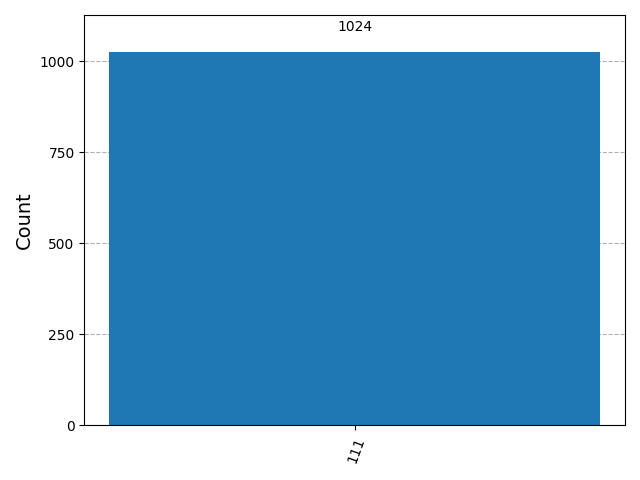